# Advance Regression Surprise Housing

## Reading the Data

#### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model,metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)

#### Reading the Dataset

In [2]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Shape of the dataset
df.shape

(1460, 81)

In [4]:
#summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Cleaning the Data 

In [6]:
#Id is has no importance in our model hence let's drop it
df.drop(['Id'],axis=1,inplace=True)

In [7]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
#Checking the null value percentage of each column
for i in df.columns:
    if (100*(df[i].isna().sum()/df.shape[0]))>0:
        print(i," -> ",100*(df[i].isna().sum()/df.shape[0]))


LotFrontage  ->  17.73972602739726
Alley  ->  93.76712328767123
MasVnrType  ->  0.547945205479452
MasVnrArea  ->  0.547945205479452
BsmtQual  ->  2.5342465753424657
BsmtCond  ->  2.5342465753424657
BsmtExposure  ->  2.6027397260273974
BsmtFinType1  ->  2.5342465753424657
BsmtFinType2  ->  2.6027397260273974
Electrical  ->  0.0684931506849315
FireplaceQu  ->  47.26027397260274
GarageType  ->  5.5479452054794525
GarageYrBlt  ->  5.5479452054794525
GarageFinish  ->  5.5479452054794525
GarageQual  ->  5.5479452054794525
GarageCond  ->  5.5479452054794525
PoolQC  ->  99.52054794520548
Fence  ->  80.75342465753424
MiscFeature  ->  96.30136986301369


In [9]:
#Dropping the columns with more than 40% null values
df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [10]:
#CHecking the shape of the dataset
df.shape

(1460, 75)

In [11]:
#Checking the null value percentage
miss_col=[]

for i in df.columns:
    if (100*(df[i].isna().sum()/df.shape[0]))>0:
        miss_col.append(i)
        print(i," -> ",100*(df[i].isna().sum()/df.shape[0]))


LotFrontage  ->  17.73972602739726
MasVnrType  ->  0.547945205479452
MasVnrArea  ->  0.547945205479452
BsmtQual  ->  2.5342465753424657
BsmtCond  ->  2.5342465753424657
BsmtExposure  ->  2.6027397260273974
BsmtFinType1  ->  2.5342465753424657
BsmtFinType2  ->  2.6027397260273974
Electrical  ->  0.0684931506849315
GarageType  ->  5.5479452054794525
GarageYrBlt  ->  5.5479452054794525
GarageFinish  ->  5.5479452054794525
GarageQual  ->  5.5479452054794525
GarageCond  ->  5.5479452054794525


In [12]:
for i in miss_col:
    print(df[i].value_counts())
    print("-----------------------------------------")

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
68.0      19
24.0      19
73.0      18
79.0      17
55.0      17
72.0      17
63.0      17
100.0     16
74.0      15
66.0      15
51.0      15
52.0      14
59.0      13
82.0      12
43.0      12
40.0      12
71.0      12
67.0      12
57.0      12
76.0      11
69.0      11
92.0      10
53.0      10
88.0      10
34.0      10
86.0      10
84.0       9
77.0       9
35.0       9
44.0       9
62.0       9
61.0       8
98.0       8
96.0       8
93.0       8
58.0       7
120.0      7
95.0       7
107.0      7
91.0       6
110.0      6
41.0       6
81.0       6
89.0       6
30.0       6
105.0      6
36.0       6
94.0       6
54.0       6
48.0       6
87.0       5
56.0       5
83.0       5
37.0       5
32.0       5
47.0       5
102.0      4
42.0       4
49.0       4
103.0      3
104.0      3
130.0      3
99.0       3
108.0      3
45.0       3
97.0       2

In [13]:
# Numerical columns to be considered for imputation
miss_col_num=df[miss_col].select_dtypes(include=['int64','float64'])
miss_col_num.columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [14]:
# Categorical columns to be considered for imputation
miss_col_cat=df[miss_col].select_dtypes(include=['object'])
miss_col_cat.columns

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

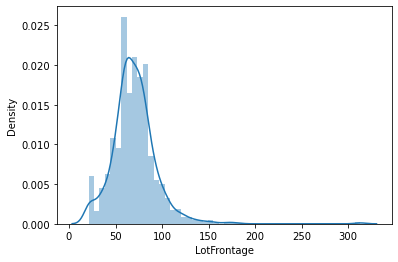

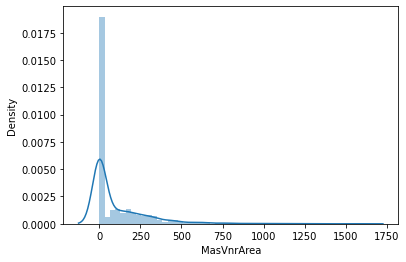

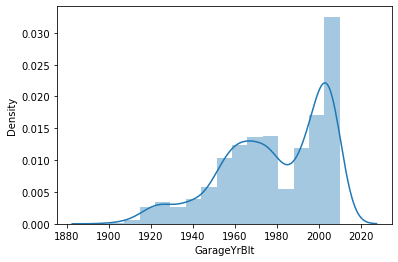

In [15]:
#Checking the distplot in numerical columns of null value columns
for i in miss_col_num:
    sns.distplot(df[i])
    plt.show()

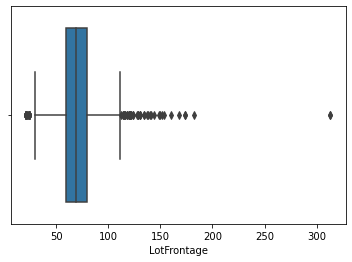

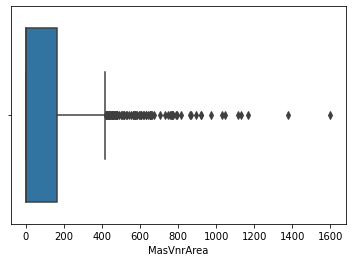

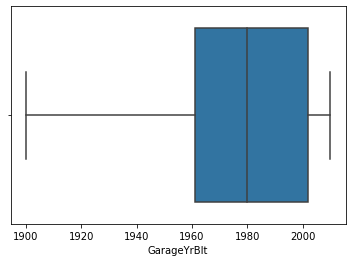

In [16]:
#Checking the outliers in numerical columns of null value columns
for i in miss_col_num:
    sns.boxplot(df[i])
    plt.show()

In [17]:
#Imputing the Numerical columns
df.LotFrontage.fillna(df.LotFrontage.median(),inplace=True)
df.MasVnrArea.fillna(df.MasVnrArea.median(),inplace=True)
df.GarageYrBlt.fillna(df.GarageYrBlt.median(),inplace=True)


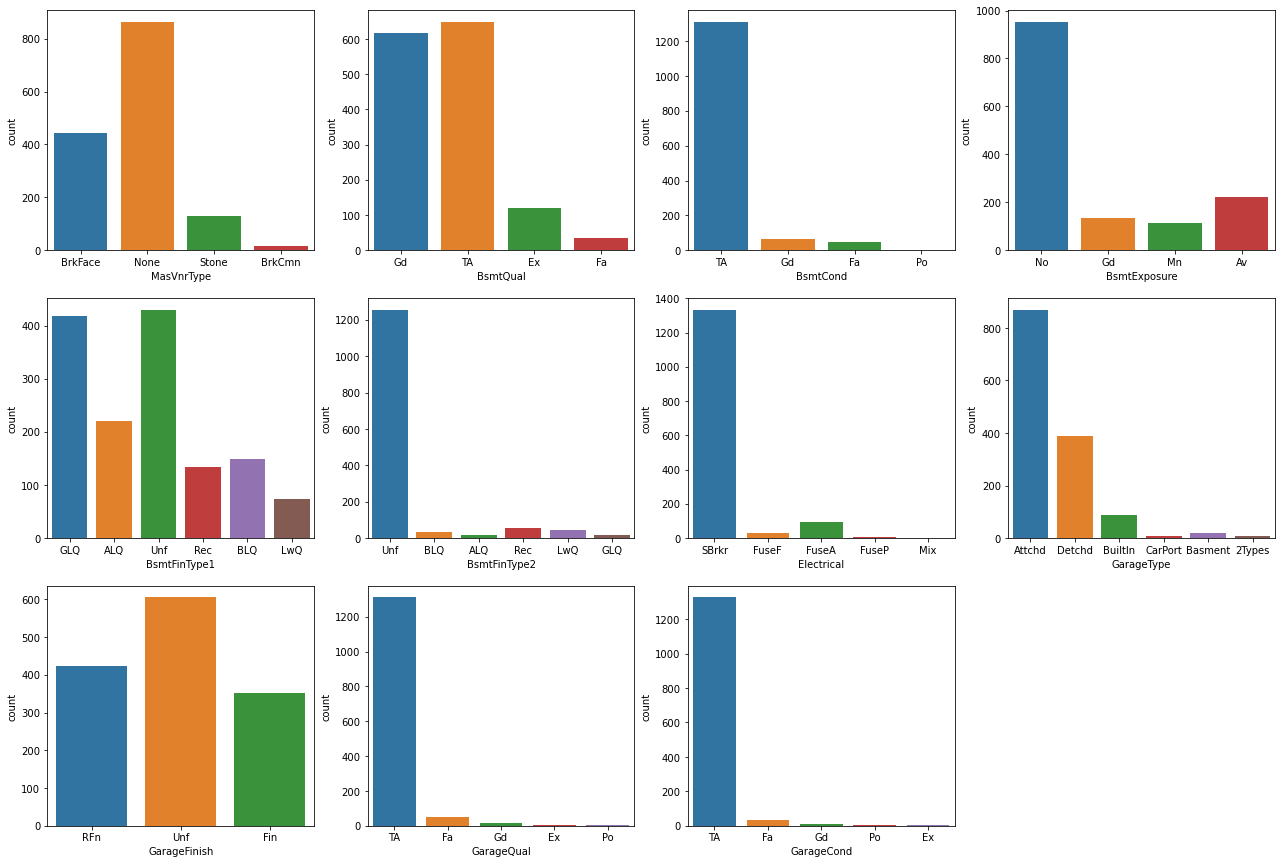

In [18]:
#Checking the countplots in categorical columns of null value columns
plt.figure(figsize=[22,15])
for i,j in enumerate(miss_col_cat.columns):
    plt.subplot(3,4,i+1)
    sns.countplot(x=j,data=df)
plt.show()

In [19]:
miss_col_cat.columns

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [20]:
#CHecking the Null Values again
for i in miss_col_cat:
            print(i," -> ",100*(df[i].isna().sum()/df.shape[0]))

MasVnrType  ->  0.547945205479452
BsmtQual  ->  2.5342465753424657
BsmtCond  ->  2.5342465753424657
BsmtExposure  ->  2.6027397260273974
BsmtFinType1  ->  2.5342465753424657
BsmtFinType2  ->  2.6027397260273974
Electrical  ->  0.0684931506849315
GarageType  ->  5.5479452054794525
GarageFinish  ->  5.5479452054794525
GarageQual  ->  5.5479452054794525
GarageCond  ->  5.5479452054794525


In [21]:
# Cases when the house doesn't have the garage so imputing null with No Garage

df['GarageType'].fillna('No Garage',inplace=True)
df['GarageFinish'].fillna('No Garage',inplace=True)
df['GarageCond'].fillna('No Garage',inplace=True)
df['GarageQual'].fillna('No Garage',inplace=True)

# Cases when the house doesn't have the Basement so imputing null with No Basement

df['BsmtQual'].fillna('No Basement',inplace=True)
df['BsmtCond'].fillna('No Basement',inplace=True)
df['BsmtExposure'].fillna('No Basement',inplace=True)
df['BsmtFinType1'].fillna('No Basement',inplace=True)
df['BsmtFinType2'].fillna('No Basement',inplace=True)


df['MasVnrType'].fillna('None',inplace=True) # replacing nan with the top option of this field
df['Electrical'].fillna('SBrkr',inplace=True) # replacing nan with the top option of this field

In [22]:
#Checking the sum of ull values after treatment
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [23]:
#Checking the column information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### Outlier Treatment

In [24]:
#To check outliers
df.describe(percentiles=[.05,.10,.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
5%,20.000000,35.950000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
10%,20.000000,49.000000,5000.000000,5.000000,5.000000,1924.900000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,106475.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000


In [25]:
# From above summary it is found that these columns have outliers which really need to be treated
outliers=['LotFrontage','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','OpenPorchSF','GrLivArea']

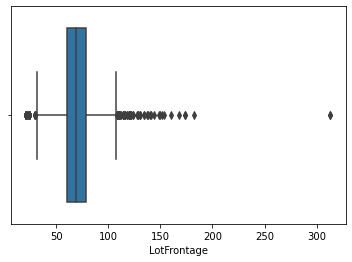

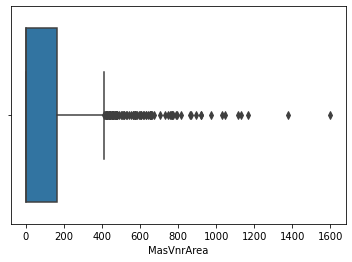

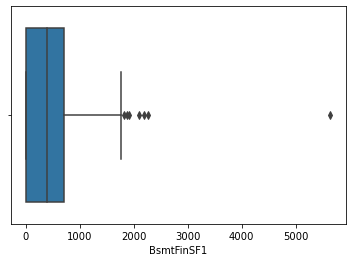

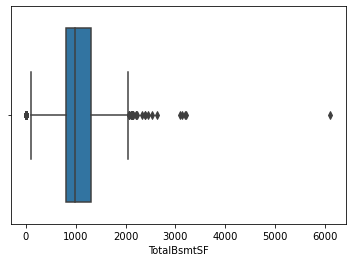

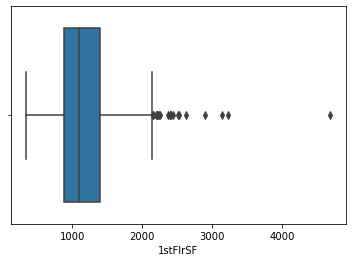

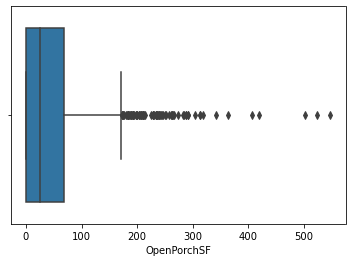

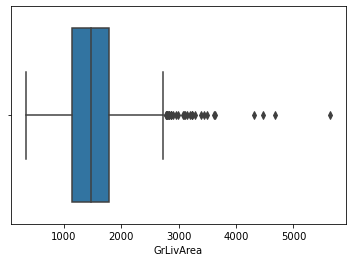

In [26]:
# Plotting boxplot of columns containing outliers
for i in outliers:
    sns.boxplot(df[i])
    plt.show()

In [27]:
# By examining above box plot
out_cap=['MasVnrArea','OpenPorchSF','GrLivArea']
# Capping values beyond 99%
for i in out_cap:
    #df=df[df[i]<df[i].quantile(0.99)]
    df[i] = np.where(df[i] >df[i].quantile(0.99),df[i].quantile(0.99),df[i])

In [28]:
# LotFrontage,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,OpenPorchSF columns containing large amount of outliers
out_remove=['LotFrontage','BsmtFinSF1','TotalBsmtSF','1stFlrSF']
# Removing values beyond 99%
for i in out_remove:
    df=df[df[i]<df[i].quantile(0.99)]
    #df[i] = np.where(df[i] >df[i].quantile(0.99),df[i].quantile(0.99),df[i])

In [29]:
100*df.shape[0]/1460

95.75342465753425

In [30]:
#Checking the first 5 rows of datafame
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [31]:
miss_col_cat.columns

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [32]:
miss_col_num.columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [33]:
# Separating the numerical columns and Categorical columns

cat_col=df.select_dtypes(include=object).columns

num_col=df.select_dtypes(exclude=object).columns


In [34]:
cat_col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [35]:
num_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Dealing with skewness

In [36]:
# Checking distribution of data in categorical columns
for i in cat_col:
    print(df[i].value_counts(normalize=True,dropna=False)*100)
    print("--------------------------------------------------")

RL         78.111588
RM         15.450644
FV          4.649499
RH          1.072961
C (all)     0.715308
Name: MSZoning, dtype: float64
--------------------------------------------------
Pave    99.570815
Grvl     0.429185
Name: Street, dtype: float64
--------------------------------------------------
Reg    64.377682
IR1    32.546495
IR2     2.646638
IR3     0.429185
Name: LotShape, dtype: float64
--------------------------------------------------
Lvl    90.271817
Bnk     4.077253
HLS     3.218884
Low     2.432046
Name: LandContour, dtype: float64
--------------------------------------------------
AllPub    99.928469
NoSeWa     0.071531
Name: Utilities, dtype: float64
--------------------------------------------------
Inside     72.389127
Corner     17.811159
CulDSac     6.151645
FR2         3.361946
FR3         0.286123
Name: LotConfig, dtype: float64
--------------------------------------------------
Gtl    94.921316
Mod     4.220315
Sev     0.858369
Name: LandSlope, dtype: float64


In [37]:
#categorical Columns which are highly skewed having one biased category with more than 80%
skewed_col=['Street','LandContour','Utilities','LandSlope','Condition1','Condition2','RoofMatl','ExterCond','BsmtCond',
  'BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','SaleType']


In [38]:
df.drop(skewed_col,axis=1,inplace=True)

In [39]:
# Storing updated categorical columns in cat_col
cat_col=df.select_dtypes(include=['object']).columns
cat_col

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object')

## Deriving a feature

In [40]:
import datetime
#Getting the age of the houses
df['CurrentYear'] = datetime.datetime.now().year
df['Age'] = df['CurrentYear'] - df['YearBuilt']
df.drop(['CurrentYear', 'YearBuilt'], axis = 1, inplace = True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1398 non-null   int64  
 1   MSZoning       1398 non-null   object 
 2   LotFrontage    1398 non-null   float64
 3   LotArea        1398 non-null   int64  
 4   LotShape       1398 non-null   object 
 5   LotConfig      1398 non-null   object 
 6   Neighborhood   1398 non-null   object 
 7   BldgType       1398 non-null   object 
 8   HouseStyle     1398 non-null   object 
 9   OverallQual    1398 non-null   int64  
 10  OverallCond    1398 non-null   int64  
 11  YearRemodAdd   1398 non-null   int64  
 12  RoofStyle      1398 non-null   object 
 13  Exterior1st    1398 non-null   object 
 14  Exterior2nd    1398 non-null   object 
 15  MasVnrType     1398 non-null   object 
 16  MasVnrArea     1398 non-null   float64
 17  ExterQual      1398 non-null   object 
 18  Foundati

### Checking the correlations

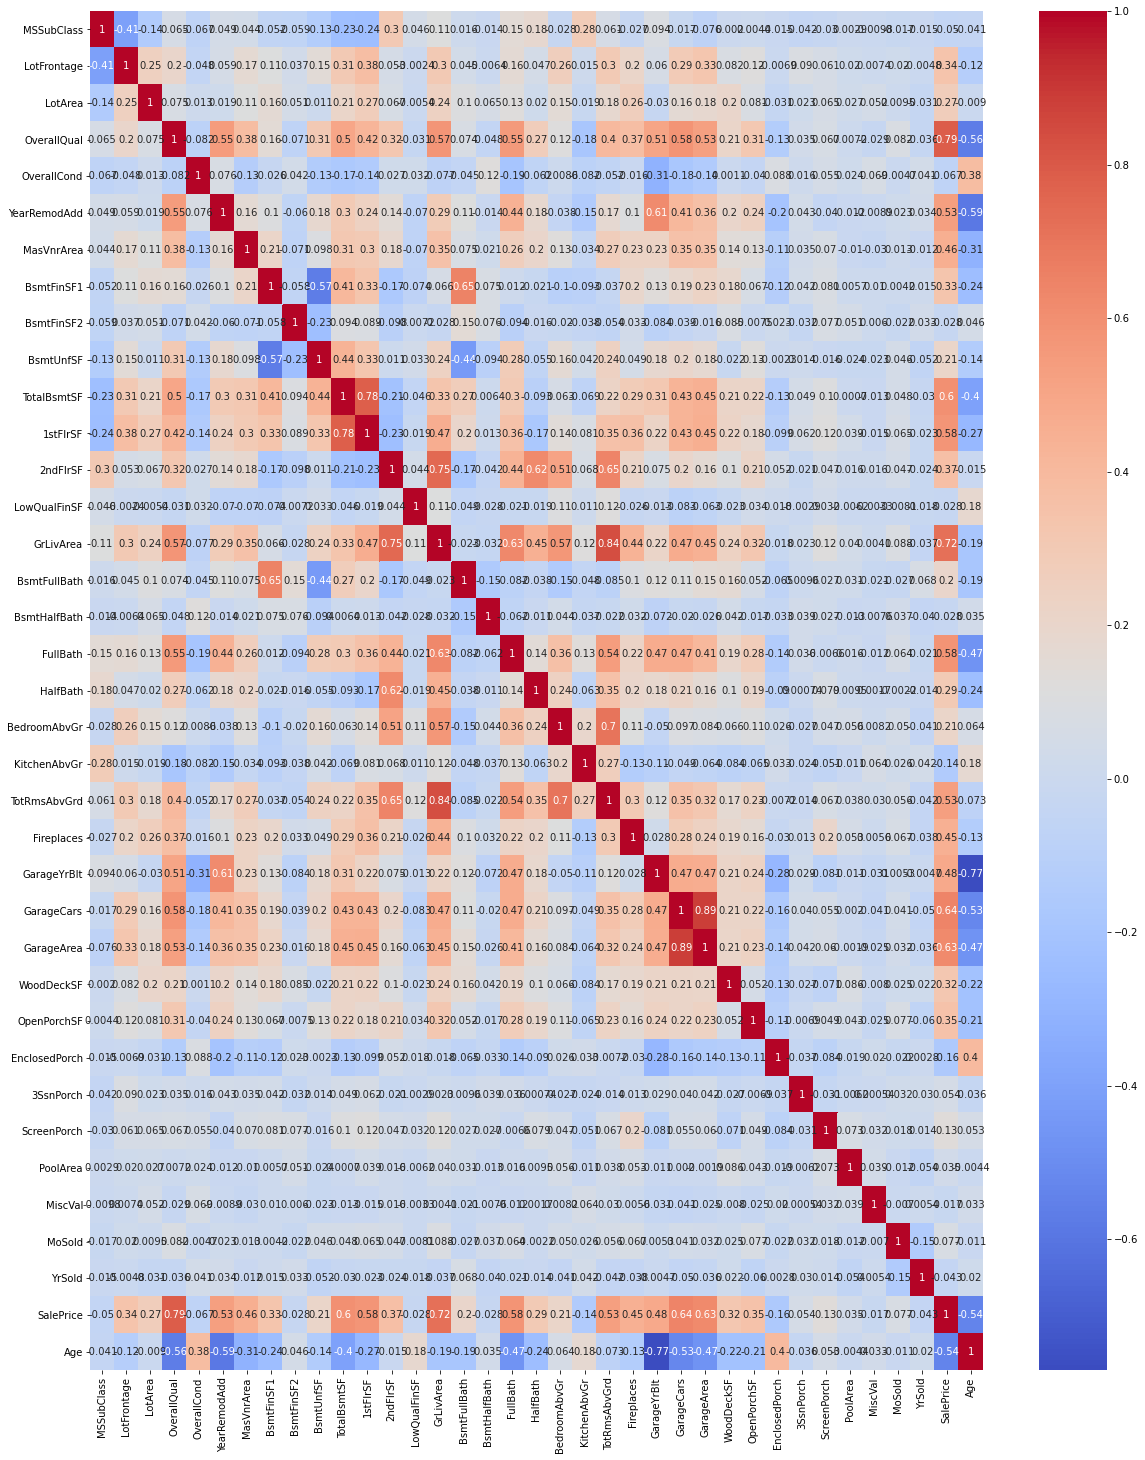

In [42]:
# Checking the Heatmap

plt.figure(figsize=[20,25])
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

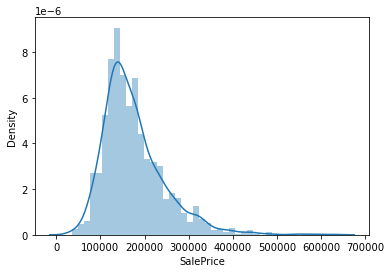

In [43]:
# Checking the skewness in the target variable
sns.distplot(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

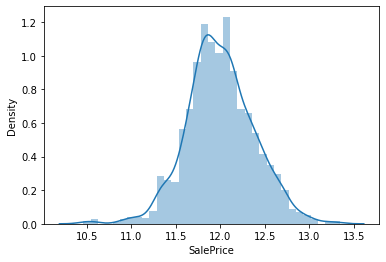

In [44]:
# Doing Log Tranformation to reduce skewness and make it normalized for model building
df['SalePrice']=np.log(df['SalePrice'])
sns.distplot(df['SalePrice'])

## Data Preparation

In [45]:
#Splitting into X and Y
X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [46]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,Age
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,61.0,0,0,0,0,0,2,2008,Normal,19
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0.0,0,0,0,0,0,5,2007,Normal,46
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,42.0,0,0,0,0,0,9,2008,Normal,21
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,35.0,272,0,0,0,0,2,2006,Abnorml,107
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,84.0,0,0,0,0,0,12,2008,Normal,22


In [47]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [48]:
#Creating categorical variables for dummies
cat_col=X.select_dtypes(include=['object'])
cat_col.head()

,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleCondition
0,RL,Reg,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,Attchd,RFn,Normal
1,RL,Reg,FR2,Veenker,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,RFn,Normal
2,RL,IR1,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,RFn,Normal
3,RL,IR1,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Detchd,Unf,Abnorml
4,RL,IR1,FR2,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn,Normal


### Creating Dummies 

In [49]:
# convert into dummies - one hot encoding
dum=pd.get_dummies(cat_col,drop_first=True)
dum.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [50]:
# dropping the categorical variables 
X=X.drop(list(cat_col.columns),axis=1)

In [51]:
# concat dummy variables with X
X = pd.concat([X, dum], axis=1)

In [52]:
pd.set_option("display.max_columns", None)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,196.0,706,0,150,856,856,854,0,1710.0,1,0,2,1,3,1,8,0,2003.0,2,548,0,61.0,0,0,0,0,0,2,2008,19,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,0.0,978,0,284,1262,1262,0,0,1262.0,0,1,2,0,3,1,6,1,1976.0,2,460,298,0.0,0,0,0,0,0,5,2007,46,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2002,162.0,486,0,434,920,920,866,0,1786.0,1,0,2,1,3,1,6,1,2001.0,2,608,0,42.0,0,0,0,0,0,9,2008,21,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1970,0.0,216,0,540,756,961,756,0,1717.0,1,0,1,0,3,1,7,1,1998.0,3,642,0,35.0,272,0,0,0,0,2,2006,107,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0

### Scaling

In [53]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale
#Since after using scale function to scale the data, df is converted to numpy array and column name get lost
#Thats why using cols to store column names which will be later used to assign column names to scaled data
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'GarageType_Detchd', 'GarageType_No Garage', 'GarageFinish_No Garage',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=162)

In [54]:
df.shape

(1398, 57)

### Splitting into Train and Test

In [55]:
# split into train and test
np.random.seed(0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [56]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,9.780000e+02,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,9.780000e+02,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,9.780000e+02,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.0000

In [57]:
y_train.describe()

count    978.000000
mean      11.993457
std        0.380272
min       10.460242
25%       11.763684
50%       11.970350
75%       12.230765
max       13.345507
Name: SalePrice, dtype: float64

In [58]:
X_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,4.200000e+02,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,4.200000e+02,420.000000,4.200000e+02,420.000000,4.200000e+02,420.000000,420.000000,4.200000e+02,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,4.200000e+02,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,42

In [59]:
y_test.describe()

count    420.000000
mean      12.015718
std        0.379442
min       10.542706
25%       11.775097
50%       12.013701
75%       12.245881
max       13.275828
Name: SalePrice, dtype: float64

## ModelBuilding

In [60]:
# Importing libraries for further analysis of the dataframe
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

In [61]:
#Intantiating LM
lm=LinearRegression()

#Fitting a line
lm.fit(X_train,y_train)

# running RFE
rfe = RFE(lm,50)#Choosing 50 features            
rfe = rfe.fit(X_train, y_train)


In [62]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 35),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 66),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 26),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 75),
 ('FullBath', False, 24),
 ('HalfBath', False, 27),
 ('BedroomAbvGr', False, 68),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 62),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 64),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 9),
 ('OpenPorchSF', False, 107),
 ('EnclosedPorch', False, 36),
 ('3SsnPorch', False, 48),
 ('ScreenPorch', False, 21),
 ('PoolArea', False, 95),
 ('MiscVal', False, 53),
 ('MoSold', False, 94),
 ('YrSold', False, 99),
 ('Age', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning

In [63]:
#Selected columns by RFE
col=X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenAbvGr', 'Fireplaces',
       'GarageCars', 'GarageArea', 'Age', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'BldgType_Twnhs', 'HouseStyle_1Story',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_Wd Sdng',
       'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtFinType1_No Basement',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      d

In [64]:
#Eliminated columns by RFE
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'MasVnrArea', 'LowQualFinSF', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'WoodDeckSF',
       ...
       'HeatingQC_TA', 'GarageType_Basment', 'GarageType_CarPort',
       'GarageType_No Garage', 'GarageFinish_No Garage', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family'],
      dtype='object', length=112)

In [65]:
# Associate the new 50 columns to X_train and X_test for further analysis
X_train = X_train[col]
X_test =  X_test[col]

In [66]:
X_train.shape

(978, 50)

In [67]:
X_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,KitchenAbvGr,Fireplaces,GarageCars,GarageArea,Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_MeadowV,Neighborhood_Somerst,Neighborhood_StoneBr,BldgType_Twnhs,HouseStyle_1Story,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_Wd Sdng,Exterior2nd_Wd Sdng,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtFinType1_No Basement,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,SaleCondition_Normal,SaleCondition_Partial
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000
mean,-0.032534,-0.023948,-0.019238,-0.004054,0.010687,-0.015858,0.013632,0.003163,-0.007837,-0.004613,0.000492,-0.004871,0.011746,0.002448,0.012129,-0.011564,-0.011219,0.014885,-0.002293,0.005026,-0.007249,0.008183,-0.003254,0.012642,0.019660,-0.010541,-0.016801,-0.000483,0.004074,-0.005144,0.012524,0.016255,0.009692,0.011490,0.003481,0.002336,0.008169,0.023005,-0.000506,-0.005192,-0.008593,-0.001191,0.027769,-0.002417,-0.000184,-0.017956,-0.014820,0.013225,0.021413,-0.010031
std,1.005214,0.744718,1.007638,1.009977,0.992360,1.006151,1.043627,0.997847,1.009758,1.001152,0.995692,0.996289,1.004922,0.982263,1.008745,1.010158,1.001490,1.007838,0.995556,1.024102,1.005404,1.008275,0.992147,1.021642,1.084356,0.980880,0.934281,0.999198,1.000620,1.004303,1.010803,1.195839,1.026814,1.196023,1.004094,1.002999,1.001539,1.067946,1.000435,1.000013,0.986849,0.996936,1.077916,1.000025,1.000518,1.003503,0.972765,1.007135,0.981448,0.984723
min,-2.599085,-1.046422,-3.787093,-4.092243,-1.666539,-1.026681,-0.283888,-1.301950,-2.754128,-2.313990,-0.811656,-2.198965,-0.804101,-4.745775,-0.930422,-2.354419,-2.244069,-1.265466,-0.220822,-0.104144,-1.889081,-0.427482,-0.188562,-0.273053,-0.110950,-0.254435,-0.129334,-0.178141,-0.971786,-1.984926,-0.468930,-0.037851,-0.175993,-0.026755,-0.405006,-0.395383,-0.878557,-0.160246,-0.860797,-0.910957,-0.290795,-0.162578,-0.167156,-0.819908,-1.033464,-1.191086,-0.254435,-0.613176,-2.196588,-0.293679
25%,-0.455966,-0.325655,-0.774657,-0.525562,-0.845482,-1.026681,-0.283888,-0.767912,-0.647494,-0.801246,-0.811656,-0.744806,-0.804101,-0.210851,-0.930422,-1.001015,-0.673080,-0.935597,-0.220822,-0.104144,0.529358,-0.427482,-0.188562,-0.273053,-0.110950,-0.254435,-0.129334,-0.178141,-0.971786,0.503797,-0.468930,-0.037851,-0.175993,-0.026755,-0.405006,-0.395383,-0.878557,-0.160246,-0.860797,-0.910957,-0.290795,-0.162578,-0.167156,-0.819908,-1.033464,-1.191086,-0.254435,-0.613176,0.455251,-0.293679
50%,0.038600,-0.096617,-0.021548,-0.525562,0.434401,-0.132841,-0.283888,-0.183790,-0.119485,-0.157099,-0.811656,-0.103794,-0.804101,-0.210851,0.661659,0.352388,0.021640,-0.044950,-0.220822,-0.104144,0.529358,-0.427482,-0.188562,-0.273053,-0.110950,-0.254435,-0.129334,-0.178141,-0.971786,0.503797,-0.468930,-0.037851,-0.175993,-0.026755,-0.405006,-0.395383,-0.878557,-0.160246,-0.860797,-0.910957,-0.290795,-0.162578,-0.167156,-0.819908,0.967620,0.839570,-0.254435,-0.613176,0.455251,-0.293679
75%,0.423262,0.149551,0.731561,0.366108,0.893227,0.667171,-0.283888,0.551749,0.623239,0.658461,0.873176,0.525602,1.161166,-0.210851,0.661659,0.352388,0.544496,0.614788,-0.220822,-0.104144,0.529358,-0.427482,-0.188562,-0.273053,-0.110950,-0.254435,-0.129334,-0.17814

In [68]:
y_train.describe()

count    978.000000
mean      11.993457
std        0.380272
min       10.460242
25%       11.763684
50%       11.970350
75%       12.230765
max       13.345507
Name: SalePrice, dtype: float64

In [69]:
X_train.shape

(978, 50)

In [70]:
# Performing Linear Regression on top 50 columns
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [71]:
# The coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

11.999953776374376
[ 0.0097742   0.03121745  0.06115182  0.05491215  0.01869249  0.0320497
  0.00710032  0.01274073  0.05287062  0.025986    0.03813236  0.08541239
  0.01565493 -0.02229278  0.01200832  0.01126385  0.02201596 -0.07284265
  0.07119544  0.03657496  0.13925818  0.10240803  0.02425178 -0.01073917
 -0.01012648  0.01127865  0.01051644 -0.01378    -0.0170781  -0.01597168
 -0.01356966 -0.01064444  0.01173621 -0.00353474 -0.0113989   0.00995658
  0.02465004 -0.0107967  -0.01938407 -0.01914466  0.01564962  0.00639863
 -0.01611304 -0.03999734 -0.04386395  0.02014584  0.01212142  0.01302482
  0.02192662  0.02925107]


### Evaluation

In [72]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)


0.9325429240026682
0.8849281517716076
9.530369392717775
6.9418373241768085
0.009744753980284024
0.016528184105182878


### Ridge and Lasso Regression


#### Ridge Regression


In [73]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [74]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [75]:
#Fitting Ridge model for alpha = 4 and printing coefficients which have been penalised
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.00978829  0.03101858  0.06208912  0.05489922  0.01883409  0.03191332
  0.00716575  0.01247661  0.05244326  0.03331723  0.04670181  0.07517634
  0.01581825 -0.02215823  0.01218324  0.01161693  0.02174102 -0.07241571
  0.05787994  0.03049147  0.11499938  0.08094731  0.02408224 -0.01043877
 -0.01000133  0.01213835  0.01044924 -0.01362386 -0.01728684 -0.01502248
 -0.01297011 -0.01046897  0.01188451 -0.00350342 -0.01084744  0.00931117
  0.02486385 -0.01042717 -0.01915359 -0.01900689  0.0155679   0.00632894
 -0.01575808 -0.03782124 -0.04140613  0.020151    0.01230347  0.01290943
  0.02308574  0.03008415]


In [76]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9323789823426858
0.8846640617750487
9.5535311523314
6.957768847162473
0.009768436761075052
0.016566116302767792


### Lasso Regression

In [77]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [78]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [79]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
         
lasso.fit(X_train, y_train)  

Lasso(alpha=0.0001)

In [80]:
lasso.coef_

array([ 0.00962471,  0.0311374 ,  0.06196877,  0.05506856,  0.01862182,
        0.02014754,  0.00240498, -0.        ,  0.06353765,  0.02359515,
        0.03511949,  0.08898812,  0.01557755, -0.02214676,  0.01203071,
        0.0116249 ,  0.02196661, -0.07291559,  0.06777312,  0.03488094,
        0.13278456,  0.09659278,  0.02408945, -0.01048625, -0.00993084,
        0.01123407,  0.01036666, -0.01373153, -0.01654665, -0.01419627,
       -0.011857  , -0.01045445,  0.01186596, -0.00341584, -0.01068195,
        0.00917354,  0.02458242, -0.01035805, -0.01877383, -0.01843765,
        0.01561266,  0.00638335, -0.01571619, -0.03860529, -0.04234609,
        0.0192954 ,  0.01170208,  0.01221483,  0.02201765,  0.0293743 ])

In [81]:
y_pred_test

array([12.04176468, 12.42265329, 11.89165592, 12.59995319, 12.2662942 ,
       11.98681753, 12.48337211, 11.9291921 , 11.2907578 , 11.89562009,
       11.42692092, 11.41610696, 12.14809866, 12.1796742 , 12.31245094,
       11.72119382, 11.5711203 , 12.16817747, 11.68968266, 11.33460502,
       12.56733122, 11.71875642, 12.14077438, 11.56970579, 11.98372367,
       11.45577003, 12.21530266, 12.24496912, 12.52074893, 12.1605833 ,
       12.15984581, 11.72767411, 11.58415081, 12.62422342, 11.94799884,
       12.07927627, 12.14404874, 12.24965648, 11.70415841, 12.3739262 ,
       12.08459643, 11.81544111, 13.28928829, 12.36502452, 11.66354693,
       12.33923254, 12.27306321, 11.86018158, 12.20437838, 12.58661827,
       11.85228133, 11.65458698, 11.94945209, 12.0316529 , 12.20911711,
       12.16755207, 11.43785542, 12.0808146 , 11.64776629, 11.19183518,
       12.46305871, 11.55676965, 12.22227721, 12.98476271, 11.70211719,
       11.79526489, 12.20656846, 11.88338382, 12.17275701, 11.55

In [82]:
y_pred_test

array([12.04176468, 12.42265329, 11.89165592, 12.59995319, 12.2662942 ,
       11.98681753, 12.48337211, 11.9291921 , 11.2907578 , 11.89562009,
       11.42692092, 11.41610696, 12.14809866, 12.1796742 , 12.31245094,
       11.72119382, 11.5711203 , 12.16817747, 11.68968266, 11.33460502,
       12.56733122, 11.71875642, 12.14077438, 11.56970579, 11.98372367,
       11.45577003, 12.21530266, 12.24496912, 12.52074893, 12.1605833 ,
       12.15984581, 11.72767411, 11.58415081, 12.62422342, 11.94799884,
       12.07927627, 12.14404874, 12.24965648, 11.70415841, 12.3739262 ,
       12.08459643, 11.81544111, 13.28928829, 12.36502452, 11.66354693,
       12.33923254, 12.27306321, 11.86018158, 12.20437838, 12.58661827,
       11.85228133, 11.65458698, 11.94945209, 12.0316529 , 12.20911711,
       12.16755207, 11.43785542, 12.0808146 , 11.64776629, 11.19183518,
       12.46305871, 11.55676965, 12.22227721, 12.98476271, 11.70211719,
       11.79526489, 12.20656846, 11.88338382, 12.17275701, 11.55

In [83]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9325209678545425
0.8852037098277812
9.533471368292389
6.925213977730452
0.009747925734450295
0.01648860470888203


In [84]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'],
            'Linear Regression': metric,
            'Ridge Regression': metric1,
            'Lasso Regression': metric2
           }

lr_metric = pd.DataFrame(lr_table)
lr_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.932543,0.932379,0.932521
1,R2 Score (Test),0.884928,0.884664,0.885204
2,RSS (Train),9.530369,9.553531,9.533471
3,RSS (Test),6.941837,6.957769,6.925214
4,RMSE (Train),0.098716,0.098835,0.098732
5,RMSE (Test),0.128562,0.128709,0.128408


#### Lets observe the changes in the coefficients after regularization

In [85]:
betas = pd.DataFrame(index=col)

In [86]:
betas.rows = col

In [87]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [88]:
# Displaying coefficients of each feature predicted by Linear, Ridge and Lasso Regression:
# Arranging the columns as per the co-efficients perdicted by Lasso Regression
pd.set_option('display.max_rows', None)
betas.sort_values('Lasso',ascending=False)

,Linear,Ridge,Lasso
MSZoning_RL,0.139258,0.114999,0.132785
MSZoning_RM,0.102408,0.080947,0.096593
GrLivArea,0.085412,0.075176,0.088988
MSZoning_FV,0.071195,0.057880,0.067773
TotalBsmtSF,0.052871,0.052443,0.063538
OverallQual,0.061152,0.062089,0.061969
OverallCond,0.054912,0.054899,0.055069
2ndFlrSF,0.038132,0.046702,0.035119
MSZoning_RH,0.036575,0.030491,0.034881
LotArea,0.031217,0.031019,0.031137


### Inferences:
    
- Optimal value of alpha for ridge and lasso regression:
  - Ridge: 4
  - Lasso: 0.0001
    
    
    
#### Top 10 features identified as per Lasso Regression which are significant in predicting the price of a house. 


- MSZoning_RL	: Zoning-Residential Low Density
- MSZoning_RM	: Zoning-Residential Medium Density
- GrLivArea	: Above grade (ground) living area square feet
- MSZoning_FV : Zoning-Floating Village Residential
- TotalBsmtSF : Total square feet of basement area	
- OverallQual	: Rates the overall material and finish of the house
- OverallCond	: Rates the overall condition of the house
- 2ndFlrSF    : Second floor square feet	
- MSZoning_RH	: Zoning-Residential High Density
- LotArea	    : Lot size in square feet


- As the above variables co-efficient are positive.
- Then more the value of these variables/features are, more will be the Sale price of the house.


## Assignment Part II

#### Doubling the optimal lambda/alpha value for both ridge and Lasso regression

### Ridge Regression

In [90]:
#Fitting Ridge model for alpha = 4*2 and printing coefficients which have been penalised
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.00980789  0.03083293  0.06279985  0.05478028  0.01903747  0.03182964
  0.00719721  0.01224666  0.05209862  0.03541545  0.04876482  0.07221138
  0.01587073 -0.02200393  0.01238112  0.01204206  0.02159415 -0.07165487
  0.04901564  0.02641892  0.09878123  0.06653123  0.0239245  -0.01020389
 -0.0098938   0.01267109  0.01040748 -0.01345603 -0.01732588 -0.01413875
 -0.01226669 -0.0103365   0.01198166 -0.00347721 -0.01054599  0.00886001
  0.02502578 -0.01022927 -0.01898212 -0.01900762  0.01552075  0.00618421
 -0.01539412 -0.03587288 -0.03930535  0.02008305  0.0124316   0.01263504
  0.02375434  0.03056952]


In [91]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9320778642467432
0.8844013785408286
9.596073267339136
6.973615505644281
0.009811935856174986
0.01660384644201019


### Lasso Regression

In [92]:
#Fitting Lasso model for alpha = 0.0001*2 and printing coefficients which have been penalised

alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [93]:
lasso.coef_

array([ 0.00947383,  0.03106846,  0.06279656,  0.05524363,  0.01855551,
        0.02027318,  0.00241568, -0.        ,  0.06324085,  0.019951  ,
        0.03053049,  0.09431636,  0.01549184, -0.02198642,  0.01206393,
        0.01200301,  0.0219215 , -0.0729813 ,  0.06441037,  0.03322131,
        0.12642423,  0.0908795 ,  0.02393619, -0.01021841, -0.00972876,
        0.01118606,  0.01021581, -0.01368138, -0.01597397, -0.0124163 ,
       -0.01013692, -0.01026452,  0.01199544, -0.00329436, -0.00998551,
        0.00839848,  0.02450883, -0.00992172, -0.01817441, -0.01774149,
        0.01558373,  0.00637565, -0.01531448, -0.03719674, -0.04081638,
        0.01846213,  0.01129186,  0.01140339,  0.02209641,  0.02948602])

In [94]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9324536062460502
0.8854308638874594
9.542988249988305
6.9115106562483515
0.009757656697329555
0.016455977752972265


In [95]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'],
            'Linear Regression': metric,
           'Ridge Regression': metric1,
            'Lasso Regression': metric2
           }

lr_metric = pd.DataFrame(lr_table)
lr_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.932543,0.932078,0.932454
1,R2 Score (Test),0.884928,0.884401,0.885431
2,RSS (Train),9.530369,9.596073,9.542988
3,RSS (Test),6.941837,6.973616,6.911511
4,RMSE (Train),0.098716,0.099055,0.098781
5,RMSE (Test),0.128562,0.128856,0.128281


In [96]:
betas = pd.DataFrame(index=col)
betas.rows = col

In [97]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [98]:
# Displaying coefficients of each feature predicted by Linear, Ridge and Lasso Regression:
# Arranging the columns as per the co-efficients perdicted by Lasso Regression
pd.set_option('display.max_rows', None)
betas.sort_values('Lasso',ascending=False)

,Linear,Ridge,Lasso
MSZoning_RL,0.139258,0.098781,0.126424
GrLivArea,0.085412,0.072211,0.094316
MSZoning_RM,0.102408,0.066531,0.090879
MSZoning_FV,0.071195,0.049016,0.064410
TotalBsmtSF,0.052871,0.052099,0.063241
OverallQual,0.061152,0.062800,0.062797
OverallCond,0.054912,0.054780,0.055244
MSZoning_RH,0.036575,0.026419,0.033221
LotArea,0.031217,0.030833,0.031068
2ndFlrSF,0.038132,0.048765,0.030530


### removing the five most important predictor variables in the lasso model

#### Top 5 features in Lasso regression are:
    - MSZoning_RL
    - GrLivArea
    - MSZoning_RM
    - MSZoning_FV 
    - TotalBsmtSF


In [99]:
X_train=X_train.drop(['MSZoning_RL','MSZoning_RM','GrLivArea','MSZoning_FV','TotalBsmtSF'],axis=1)
X_test=X_test.drop(['MSZoning_RL','MSZoning_RM','GrLivArea','MSZoning_FV','TotalBsmtSF'],axis=1)

In [100]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [101]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [102]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [103]:
lasso_list = pd.DataFrame({'Features':X_train.columns})
lasso_list['co-efficients']=lasso.coef_
lasso_list.sort_values('co-efficients',ascending=False).head(10)

,Features,co-efficients
9,2ndFlrSF,0.114765
8,1stFlrSF,0.093891
5,BsmtFinSF1,0.077802
2,OverallQual,0.068625
7,BsmtUnfSF,0.058464
3,OverallCond,0.056349
1,LotArea,0.033649
44,SaleCondition_Partial,0.033587
43,SaleCondition_Normal,0.026779
6,BsmtFinSF2,0.025945


### Inferences:
After dropping previous top 5 features and rebuilding the model.

New top five features identified :
    - 2ndFlrSF: Second floor square feet
    - 1stFlrSF: First Floor square feet
    - BsmtFinSF1: Type 1 finished square feet
    - OverallQual: Rates the overall material and finish of the house
    - BsmtUnfSF: Unfinished square feet of basement area